In [1]:
import pandas as pd
df = pd.read_csv('static/data/melon_year6070_concat.csv')
df.head(1)

,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq
0,4083218,내일또 만납시다,금호동,성인가요/트로트,여인을 못잊어/그정 못잊어,전우,박춘석,20130401.0,https://cdnimg.melon.co.kr/cm/album/images/021...,13,263,하루의 일을 끝내고 돌아가는\r\n거리엔 사람의 물결\r\n하늘엔 별이 하나 둘 반...,460454132 518268022


In [5]:
import re
df.lyric = df.lyric.apply(lambda x : x.replace('\r\n', ' ').replace('\n', ' ').replace('~', '').replace('-', '').replace('?', ''))
df.lyric.values

array(['하루의 일을 끝내고 돌아가는 거리엔 사람의 물결 하늘엔 별이 하나 둘 반짝이면 가로등 하나 둘 꽃 피네 허공을 스치는 바람은 차고 흐뭇한 마음은 애드베룬 가벼운 발길 헤어질 때 인사는 내일 또 다시 만납시다 하루의 일을 끝내고 돌아가는 거리엔 사람의 물결 하늘엔 별이 하나 둘 반짝이면 가로등 하나 둘 꽃 피네 허공을 스치는 바람은 차고 흐뭇한 마음은 애드베룬 가벼운 발길 헤어질 때 인사는 내일 또 다시 만납시다 내일 또 다시 만납시다',
       '조기를 담뿍잡아 기폭을 올리고 온다던 그배는 어이하여 아니오나 수평선 바라보며 그이름 부르면 갈매기도 우는구나 눈물의 연평도 태풍이 원수더라 한많은 사라호 황천간 그얼굴 언제다시 만나보리 해저문 백사장에 그모습 그리면 등대불만 깜박이네 눈물의 연평도',
       '&lt;1절  임이라 부르리까 당신이라고 부르리까  사랑을 하면서도 사랑을 참고사는  마음으로만 그리워 마음으로만 사무쳐  애타는 가슴  그무슨 잘못이라도 있는 것 처럼  울어야만 됩니까 울어야만 됩니까  &lt;2절  임이라 부르리까 당신이라고 부르리까  밤이면 꿈에선가 다정이 만나보고  잊지못하고 언제나 가슴속에만 간직한 못난이 마음  그무슨 잘못이라도 있는 것처럼  울어야만 됩니까 울어야만 됩니까',
       '헤일 수 없이 수많은 밤을 내 가슴 도려내는 아픔에 겨워 얼마나 울었던가 동백아가씨 그리움에 지쳐서 울다 지쳐서 꽃잎은 빨갛게 멍이 들었오 동백꽃 잎에 새겨진 사연 말 못할 그 사연을 가슴에 안고 오늘도 기다리는 동백아가씨 가신님은 그 언제 그 어느날에 외로운 동백꽃 찾아 오려나',
       '그 날 밤 그 자리에 둘이서 만났을 때 똑같은 그 순간에 똑같은 마음이 달빛에 젖은 채 밤새도록 즐거웠죠 아 그 밤이 꿈이었나 비 오는데 두고두고 못 다한 말 가슴에 새기면서 떠날 때는 말 없이 말 없이 가오리다 아무리 불러도 그 자리는 비어있네 아 그 날이 언제였나 비 오는데 사무치는 그리움을 나 어이 달래라고 떠날 때는 말

In [6]:
from wordcloud import ImageColorGenerator, WordCloud, STOPWORDS
import nltk
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
sw_wc = STOPWORDS

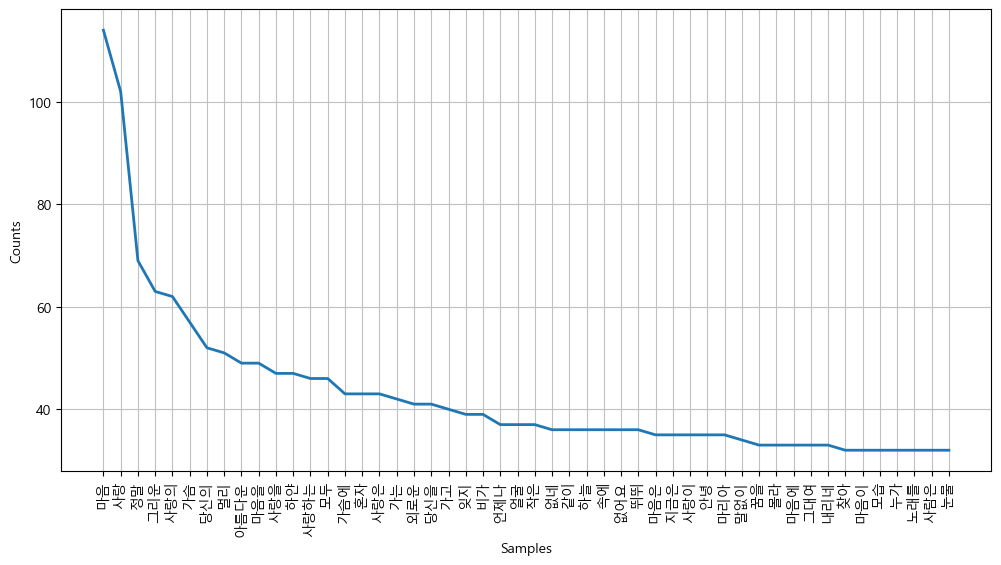

In [8]:
a = ' '.join(df.lyric.values.tolist()).split()
filtered_list = [word for word in a if len(word) > 1]
stoptext = """
    그대 내가 너를 나를 다시 나의 너의 우리 나는 없는 내게 그댈 니가 이렇게 네가 없어 있어 있는 거야 같아 싶어 너무 사람 이젠
    oh Oh uh la eh La yeah Im na Ah
"""
stop_words = stoptext.split()
stop_words.extend(sw_wc)
b = [word for word in filtered_list if word not in stop_words]
gift = nltk.Text(b, name='댄스')
plt.figure(figsize=(12,6))
gift.plot(50);

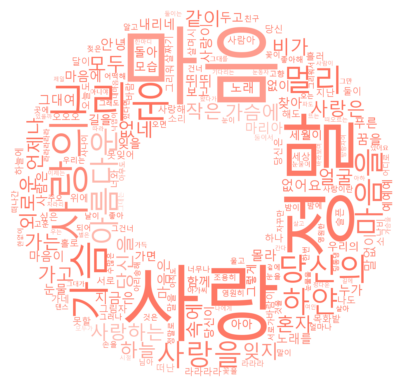

In [10]:
import numpy as np
mask = np.array(Image.open('static/img/donut/도넛1.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask, stopwords=sw_wc
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');